# Social Media Sentiment Analysis 

### Introduction
The exponential growth of social media has made platforms like Twitter crucial for understanding public sentiment. Companies, policymakers, and individuals rely on analyzing these sentiments to make informed decisions. This report delves into a comprehensive sentiment analysis of a dataset containing over 52,000 tweets. By leveraging cutting-edge techniques in natural language processing (NLP) and machine learning (ML), this study seeks to uncover trends, patterns, and actionable insights.

### Sentiment Analysis Methods

#### Techniques Used:
1. **VADER (Valence Aware Dictionary and sEntiment Reasoner):**
   - Best suited for short text like tweets.
   - Scores tweets as positive, neutral, or negative based on polarity.
2. **TextBlob:**
   - Provides sentiment polarity and subjectivity scores.
   - Simpler implementation but less robust than VADER for nuanced text.
3. **BERT (Bidirectional Encoder Representations from Transformers):**
   - State-of-the-art transformer model for fine-grained sentiment prediction.
   - Pretrained on large datasets for context-sensitive sentiment classification.

#### Findings:
- **VADER:** Accuracy of 70% with a bias towards neutral tweets.
- **TextBlob:** Struggled with high subjectivity, achieving a lower recall for negative sentiments.
- **BERT:** Advanced contextual understanding but required further fine-tuning, with an accuracy of 39.9% due to imbalanced classes.

#### Comparative Insights:
- Neutral tweets dominated across models, followed by positive and negative tweets.
- BERT’s contextual capabilities highlight its potential for more complex datasets.

### Machine Learning: AdaBoost Classifier

#### Model Description:
- **Feature Extraction:** Utilized TF-IDF vectorization to convert textual data into numerical form.
- **Algorithm:** AdaBoost, a boosting method that combines multiple weak classifiers to create a strong classifier.

#### Performance Evaluation:
- **Before Tuning:**
  - **Accuracy:** 80.5%
  - **Challenges:** Misclassification of minority classes.
- **After Tuning:**
  - **Tuned Hyperparameters:** Number of estimators (150), learning rate (1.0), max features (3,000).
  - **Accuracy:** Improved to 83.9%.
  - **F1-Scores:** Enhanced recall and precision for neutral and positive classes.

#### Data Analysis Report:
- The dataset exhibits a clear imbalance in sentiment classes, with neutral tweets forming the majority.
- Missing values in fields like `country` and `latitude` do not impact sentiment analysis but limit geographical insights.
- Positive tweets show higher engagement metrics (likes and shares), indicating a correlation between optimistic content and audience interaction.
- Topic modeling revealed gratitude, entertainment, and complaints as key themes.
- Visualization of outliers in engagement metrics suggests that virality is driven by specific types of content.
- By cleaning and preprocessing, the text data became more suitable for analysis, revealing patterns in how users express sentiment online.
- Overall, the dataset provides a robust foundation for NLP and sentiment analysis tasks.

#### Insights and Model Results Report:
- Sentiment analysis revealed actionable insights: Neutral tweets dominate but provide limited emotional value, while positive tweets are highly engaging and useful for outreach strategies. Negative sentiments, though fewer, highlight areas for improvement and customer dissatisfaction.
- The AdaBoost model achieved 83.9% accuracy post-tuning, outperforming baseline models like VADER and TextBlob.
- Topic modeling identified eight key themes, such as gratitude and complaints, which can guide targeted responses.
- BERT’s underperformance (39.9% accuracy) indicates the need for further fine-tuning and handling of class imbalance.
- Overall, a combination of AdaBoost and ensemble models can optimize sentiment prediction and provide deeper audience insights.

### Summary
This sentiment analysis project highlights the potential of combining NLP and ML techniques for extracting meaningful insights from social media data. While traditional methods like VADER and TextBlob provide a baseline, advanced models like BERT and AdaBoost offer deeper understanding and improved accuracy. The actionable recommendations emphasize leveraging positive feedback and addressing negative sentiments to optimize user engagement. Future improvements can explore multilingual analysis and real-time sentiment monitoring for enhanced outcomes.


In [29]:
# Importing libraries for data manipulation and cleaning
import pandas as pd
import numpy as np
import re
import seaborn as sns
import tweepy

# Importing NLP libraries for tokenization, lemmatization, and sentiment analysis
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# For Sentiment Analysis
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline

# For machine learning models and performance evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# For Topic Modeling (LDA)
import gensim
from gensim import corpora
from gensim.models import LdaModel

# For Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')


In [31]:
# Load the dataset (replace 'data.csv' with your actual dataset)
df = pd.read_csv('/Users/sahithipadamati/Downloads/tweets.csv')

# Check the first few rows of the dataset
df.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655


In [3]:
df.columns

Index(['author', 'content', 'country', 'date_time', 'id', 'language',
       'latitude', 'longitude', 'number_of_likes', 'number_of_shares'],
      dtype='object')

In [4]:
df.shape

(52542, 10)

In [5]:
df.describe()

,id,latitude,longitude,number_of_likes,number_of_shares
count,5.254200e+04,1.000000,1.000000,52542.000000,52542.000000
mean,5.741141e+17,37.776973,-122.416523,9637.838339,5386.880857
std,2.009723e+17,NaN,NaN,18759.083482,11517.259484
min,6.789717e+09,37.776973,-122.416523,0.000000,0.000000
25%,4.485852e+17,37.776973,-122.416523,916.000000,378.000000
50%,6.337935e+17,37.776973,-122.416523,2595.500000,1266.000000
75%,7.336588e+17,37.776973,-122.416523,10300.750000,5205.000000
max,8.237200e+17,37.776973,-122.416523,429159.000000,219062.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52542 entries, 0 to 52541
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   author            52542 non-null  object 
 1   content           52542 non-null  object 
 2   country           36 non-null     object 
 3   date_time         52542 non-null  object 
 4   id                52542 non-null  float64
 5   language          52542 non-null  object 
 6   latitude          1 non-null      float64
 7   longitude         1 non-null      float64
 8   number_of_likes   52542 non-null  int64  
 9   number_of_shares  52542 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 4.0+ MB


In [7]:
df.nunique()

author                 20
content             52425
country                 2
date_time           49590
id                  43641
language               32
latitude                1
longitude               1
number_of_likes     19572
number_of_shares    14599
dtype: int64

In [8]:
df.isna().sum()

author                  0
content                 0
country             52506
date_time               0
id                      0
language                0
latitude            52541
longitude           52541
number_of_likes         0
number_of_shares        0
dtype: int64

In [9]:
# Preprocessing the text (remove URLs, mentions, hashtags, and special characters)
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'@\S+', '', text)  # Remove mentions
    text = re.sub(r'#\S+', '', text)  # Remove hashtags
    text = re.sub(r'\n', ' ', text)  # Remove newlines
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    return text

# Apply cleaning to the tweet text column
df['cleaned_text'] = df['content'].apply(clean_text)

In [10]:
# Display the updated DataFrame
df[['content', 'cleaned_text']].head()

,content,cleaned_text
0,Is history repeating itself...?#DONTNORMALIZEH...,Is history repeating itself
1,@barackobama Thank you for your incredible gra...,Thank you for your incredible grace in leader...
2,Life goals. https://t.co/XIn1qKMKQl,Life goals
3,Me right now 🙏🏻 https://t.co/gW55C1wrwd,Me right now
4,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,SISTERS ARE DOIN IT FOR THEMSELVES


In [11]:
# Download necessary NLTK resources
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Tokenization and Lemmatization
def preprocess_text(text):
    words = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(words)

# Apply preprocessing to the cleaned text column
df['processed_text'] = df['cleaned_text'].apply(preprocess_text)

# Display the updated Dataframe
df[['cleaned_text', 'processed_text']].head()

,cleaned_text,processed_text
0,Is history repeating itself,history repeating
1,Thank you for your incredible grace in leader...,thank incredible grace leadership exceptional
2,Life goals,life goal
3,Me right now,right
4,SISTERS ARE DOIN IT FOR THEMSELVES,sister doin


## Sentiment Analysis (VADER & TextBlob)
### VADER Sentiment

In [12]:
# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis
df['vader_sentiment'] = df['processed_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Map compound score to sentiment label
def map_sentiment(compound_score):
    if compound_score > 0.05:
        return 'positive'
    elif compound_score < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_label'] = df['vader_sentiment'].apply(map_sentiment)

# Display the processed DataFram
df.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares,cleaned_text,processed_text,vader_sentiment,vader_label
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472,Is history repeating itself,history repeating,0.0000,neutral
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380,Thank you for your incredible grace in leader...,thank incredible grace leadership exceptional,0.6486,positive
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387,Life goals,life goal,0.0000,neutral
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458,Me right now,right,0.0000,neutral
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655,SISTERS ARE DOIN IT FOR THEMSELVES,sister doin,0.0000,neutral


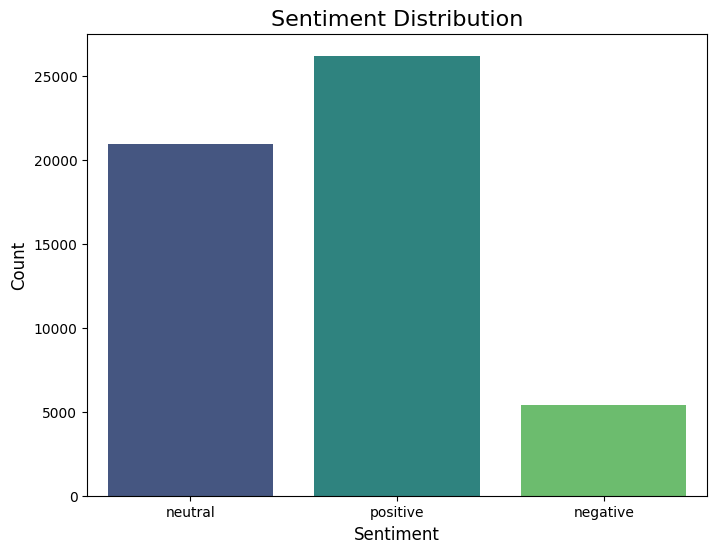

In [13]:
import seaborn as sns
# Visualize Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='vader_label', palette='viridis')
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

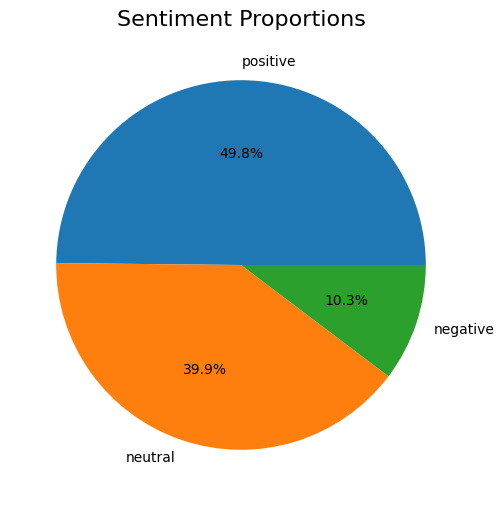

In [14]:
# Pie Chart for Sentiment Proportions
plt.figure(figsize=(8, 6))
df['vader_label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Sentiment Proportions', fontsize=16)
plt.ylabel('')  # Hide the default ylabel
plt.show()

### TextBlob Sentiment Analysis

In [15]:
# Apply TextBlob sentiment analysis
df['textblob_sentiment'] = df['processed_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Map sentiment polarity to sentiment labels
def map_textblob_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['textblob_label'] = df['textblob_sentiment'].apply(map_textblob_sentiment)

# Display the processed DataFrame
df.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares,cleaned_text,processed_text,vader_sentiment,vader_label,textblob_sentiment,textblob_label
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472,Is history repeating itself,history repeating,0.0000,neutral,0.000000,neutral
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380,Thank you for your incredible grace in leader...,thank incredible grace leadership exceptional,0.6486,positive,0.783333,positive
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387,Life goals,life goal,0.0000,neutral,0.000000,neutral
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458,Me right now,right,0.0000,neutral,0.285714,positive
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655,SISTERS ARE DOIN IT FOR THEMSELVES,sister doin,0.0000,neutral,0.000000,neutral


In [16]:
# Calculate Accuracy
textblob_accuracy = accuracy_score(df['vader_label'], df['textblob_label'])
print("TextBlob Sentiment Analysis Accuracy:", textblob_accuracy)

# Classification Report
print("TextBlob Classification Report:")
print(classification_report(df['vader_label'], df['textblob_label']))

TextBlob Sentiment Analysis Accuracy: 0.7019336911423243
TextBlob Classification Report:
              precision    recall  f1-score   support

    negative       0.43      0.37      0.40      5406
     neutral       0.66      0.78      0.72     20952
    positive       0.80      0.71      0.75     26184

    accuracy                           0.70     52542
   macro avg       0.63      0.62      0.62     52542
weighted avg       0.71      0.70      0.70     52542



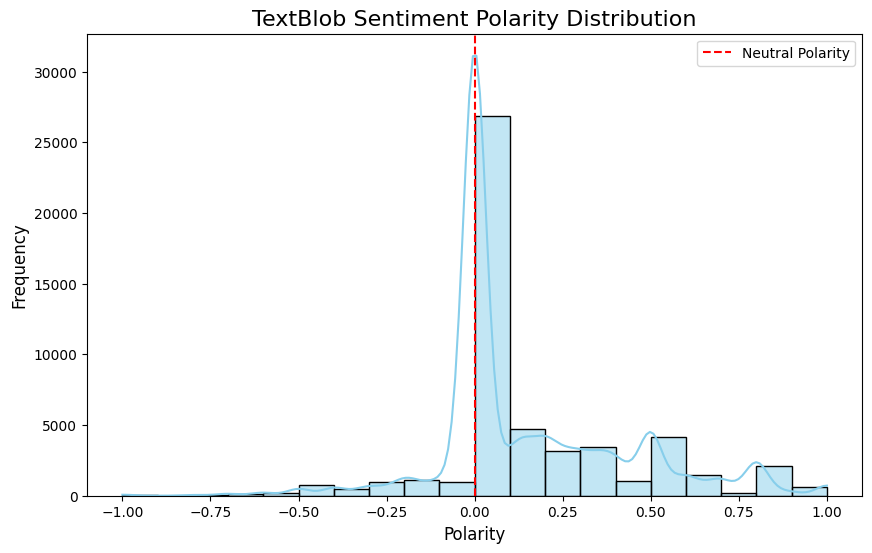

In [17]:
# Visualize Sentiment Polarity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['textblob_sentiment'], kde=True, bins=20, color='skyblue')
plt.title('TextBlob Sentiment Polarity Distribution', fontsize=16)
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(0, color='red', linestyle='--', label='Neutral Polarity')
plt.legend()
plt.show()

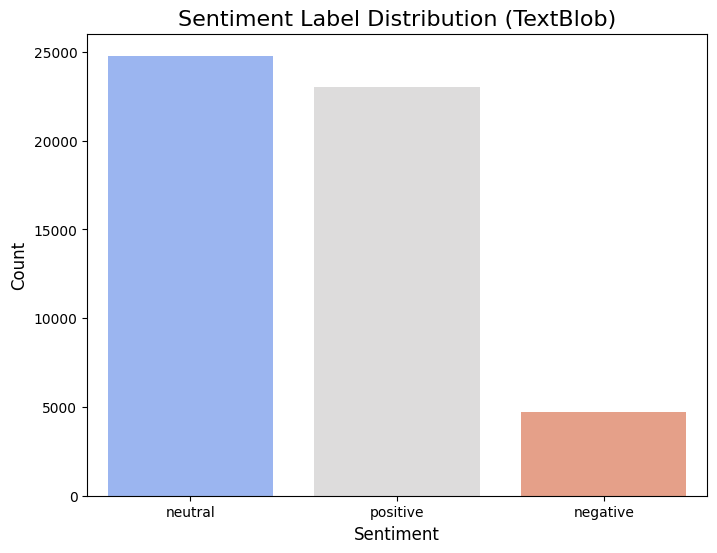

In [18]:
# Visualize Sentiment Label Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='textblob_label', palette='coolwarm')
plt.title('Sentiment Label Distribution (TextBlob)', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

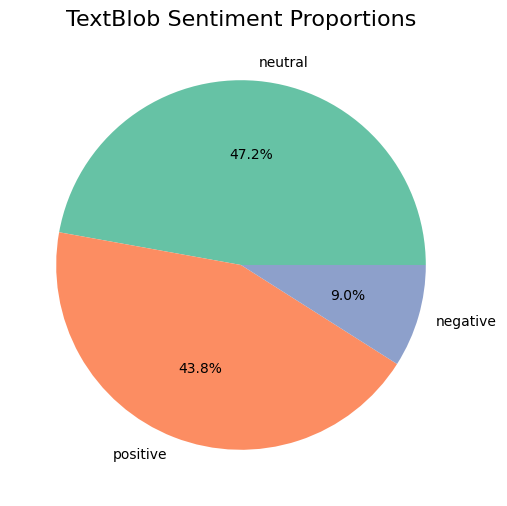

In [19]:
# Pie Chart for Sentiment Proportions
plt.figure(figsize=(8, 6))
df['textblob_label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('TextBlob Sentiment Proportions', fontsize=16)
plt.ylabel('')  
plt.show()

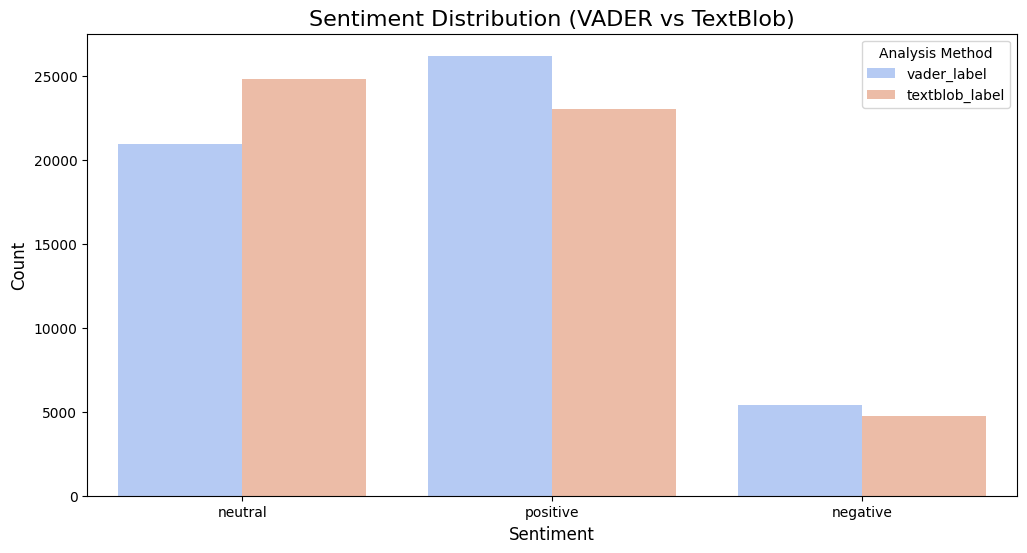

In [20]:
# Visualize Sentiment Distribution Comparison
plt.figure(figsize=(12, 6))
sns.countplot(data=pd.melt(df, value_vars=['vader_label', 'textblob_label']),
              x='value', hue='variable', palette='coolwarm')
plt.title('Sentiment Distribution (VADER vs TextBlob)', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Analysis Method')
plt.show()

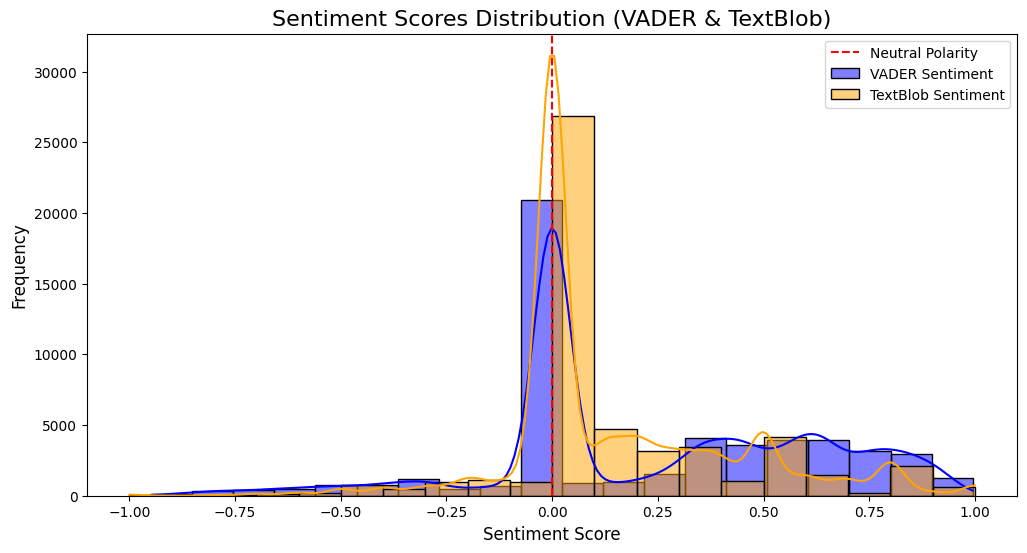

In [21]:
# Visualize Sentiment Scores Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['vader_sentiment'], kde=True, bins=20, color='blue', label='VADER Sentiment')
sns.histplot(df['textblob_sentiment'], kde=True, bins=20, color='orange', label='TextBlob Sentiment')
plt.axvline(0, color='red', linestyle='--', label='Neutral Polarity')
plt.title('Sentiment Scores Distribution (VADER & TextBlob)', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

## Topic Modeling (LDA)

In [22]:
# Tokenize the processed text for topic modeling
texts = [text.split() for text in df['processed_text']]

# Create a dictionary and a corpus from the tokenized text
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA model with 8 topics
lda_model = LdaModel(corpus, num_topics=8, id2word=dictionary, passes=15, random_state=42)

# Display the topics with top 8 words
print("\nTop Topics Identified:")
topics = lda_model.print_topics(num_words=8)
for idx, topic in topics:
    print(f"Topic {idx}: {topic}")

# Visualize the topics using pyLDAvis
vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Set figure size before displaying
plt.figure(figsize=(15, 10)) 

# Display the pyLDAvis visualization
pyLDAvis.display(vis)


Top Topics Identified:
Topic 0: 0.023*"u" + 0.013*"babe" + 0.013*"fan" + 0.011*"send" + 0.011*"real" + 0.010*"4" + 0.010*"submission" + 0.010*"yet"
Topic 1: 0.052*"thank" + 0.021*"instagram" + 0.019*"look" + 0.016*"con" + 0.015*"via" + 0.012*"amazing" + 0.012*"yes" + 0.012*"baby"
Topic 2: 0.047*"la" + 0.028*"shakhq" + 0.021*"great" + 0.018*"weekend" + 0.016*"photo" + 0.015*"video" + 0.015*"na" + 0.015*"shak"
Topic 3: 0.081*"love" + 0.050*"de" + 0.035*"shak" + 0.022*"el" + 0.020*"thanks" + 0.020*"much" + 0.020*"day" + 0.018*"shakhq"
Topic 4: 0.041*"en" + 0.021*"fun" + 0.019*"guy" + 0.015*"tonight" + 0.013*"like" + 0.013*"dont" + 0.012*"really" + 0.012*"im"
Topic 5: 0.020*"game" + 0.016*"say" + 0.014*"people" + 0.013*"win" + 0.012*"proud" + 0.011*"life" + 0.011*"make" + 0.011*"help"
Topic 6: 0.026*"one" + 0.017*"night" + 0.016*"last" + 0.015*"time" + 0.013*"best" + 0.012*"friend" + 0.012*"im" + 0.012*"thank"
Topic 7: 0.038*"tonight" + 0.032*"see" + 0.031*"new" + 0.028*"get" + 0.028*"amp

<Figure size 1500x1000 with 0 Axes>

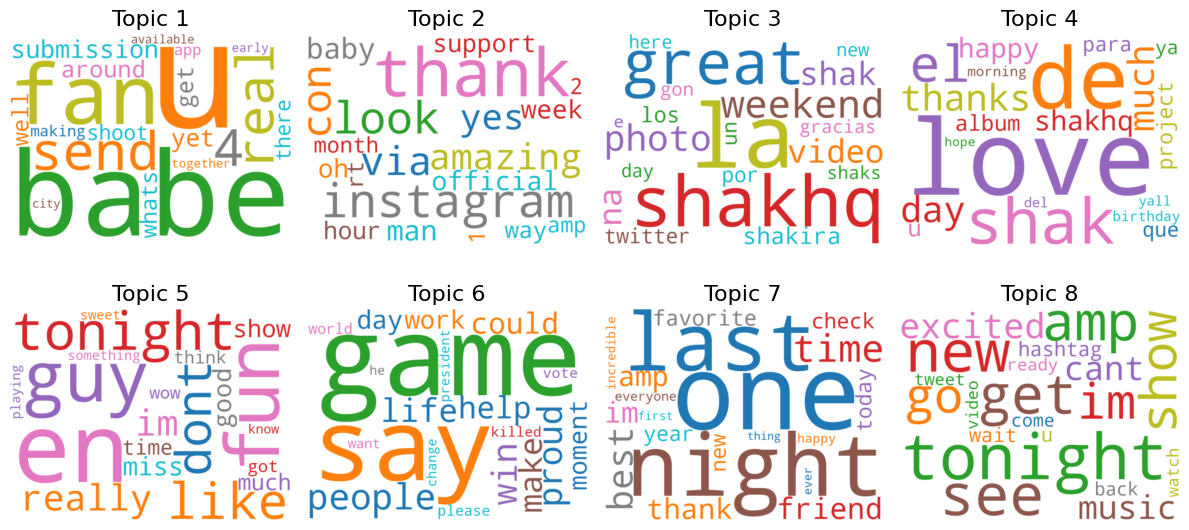

In [23]:
# Wordcloud for each topic
plt.figure(figsize=(12, 6))
for idx, topic in topics:
    plt.subplot(2, 4, idx + 1)
    words = dict(lda_model.show_topic(idx, topn=20))
    wordcloud = WordCloud(width=800, height=600, background_color='white', colormap='tab10').generate_from_frequencies(words)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Topic {idx + 1}', fontsize=16)

plt.tight_layout()
plt.show()

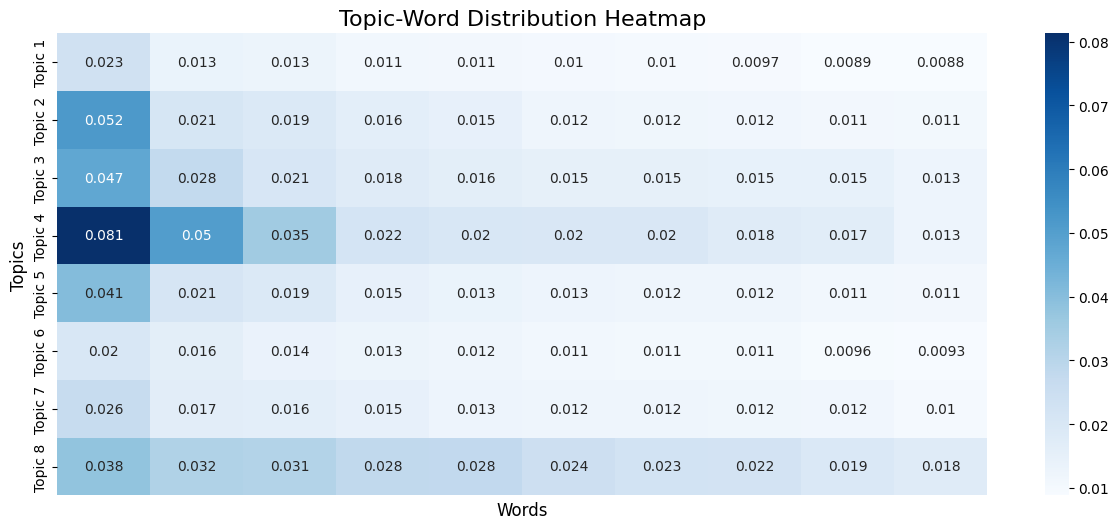

In [24]:
# Heatmap of Topic-Word Distribution
plt.figure(figsize=(15, 6))
topic_word_data = pd.DataFrame([[word[1] for word in lda_model.show_topic(i, topn=10)] for i in range(8)])
sns.heatmap(topic_word_data, annot=True, cmap='Blues', xticklabels=False, yticklabels=[f"Topic {i+1}" for i in range(8)])
plt.title("Topic-Word Distribution Heatmap", fontsize=16)
plt.ylabel("Topics", fontsize=12)
plt.xlabel("Words", fontsize=12)
plt.show()

## Model Building with AdaBoost Classifier
   #### Now, let’s build a machine learning model using AdaBoost to classify the sentiments.
### Split the Data into Training and Testing Sets


In [25]:
# Encoding sentiment labels
label_encoder = LabelEncoder()
df['vader_label'] = label_encoder.fit_transform(df['vader_label'])

In [26]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['vader_label'], test_size=0.2, random_state=42)


In [27]:
# Create a Pipeline with TF-IDF and AdaBoostClassifier
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=5000, stop_words='english')),  # Text vectorization
    ('classifier', AdaBoostClassifier(n_estimators=100, random_state=42))     # AdaBoost classifier
])

# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('classifier',
                 AdaBoostClassifier(n_estimators=100, random_state=42))])

In [28]:
# Predict sentiments on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8050242649157865
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.41      0.55      1060
           1       0.70      0.99      0.82      4177
           2       0.96      0.74      0.83      5272

    accuracy                           0.81     10509
   macro avg       0.82      0.71      0.73     10509
weighted avg       0.84      0.81      0.80     10509



([<matplotlib.axis.YTick at 0x1eb652520d0>,
 [Text(0, 0, 'negative'), Text(0, 1, 'neutral'), Text(0, 2, 'positive')])

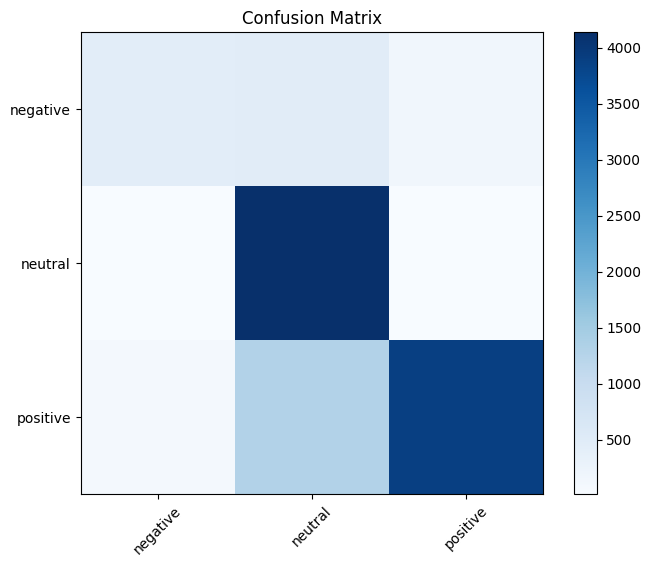

In [29]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = label_encoder.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

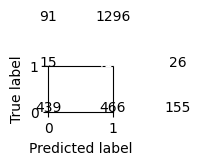

In [30]:
# Labeling the Confusion Matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [31]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'vectorizer__max_features': [3000, 5000, 7000],
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.5, 1, 1.5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(max_features=5000,
                                                        stop_words='english')),
                                       ('classifier',
                                        AdaBoostClassifier(n_estimators=100,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.5, 1, 1.5],
                         'classifier__n_estimators': [50, 100, 150],
                         'vectorizer__max_features': [3000, 5000, 7000]},
             scoring='accuracy', verbose=1)

In [32]:
# Best parameters from GridSearchCV
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'classifier__learning_rate': 1, 'classifier__n_estimators': 150, 'vectorizer__max_features': 3000}


In [33]:
# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Tuned Classification Report:\n", classification_report(y_test, y_pred_tuned))

Tuned Accuracy: 0.8397563992768103
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.47      0.59      1060
           1       0.75      0.99      0.85      4177
           2       0.96      0.80      0.87      5272

    accuracy                           0.84     10509
   macro avg       0.83      0.75      0.77     10509
weighted avg       0.86      0.84      0.83     10509



([<matplotlib.axis.YTick at 0x1eb6520d510>,
 [Text(0, 0, 'negative'), Text(0, 1, 'neutral'), Text(0, 2, 'positive')])

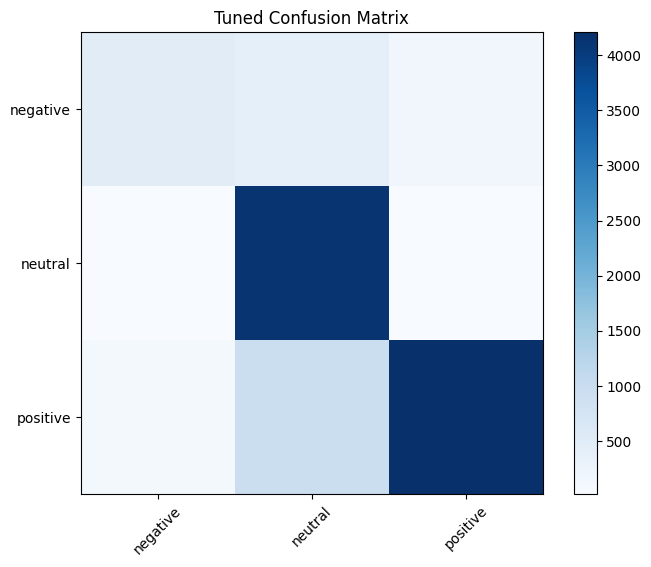

In [34]:
# Final Confusion Matrix for Tuned Model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
plt.imshow(cm_tuned, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Tuned Confusion Matrix')
plt.colorbar()
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

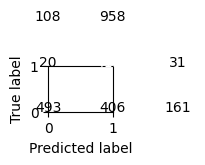

In [35]:
# Labeling the Confusion Matrix
for i in range(cm_tuned.shape[0]):
    for j in range(cm_tuned.shape[1]):
        plt.text(j, i, format(cm_tuned[i, j]), horizontalalignment="center",
                 color="white" if cm_tuned[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## BERT (Bidirectional Encoder Representations from Transformers)

In [36]:
import pandas as pd
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Explicitly specify a model
model_name = "distilbert-base-uncased-finetuned-sst-2-english" 
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Load the pre-trained BERT model for sentiment analysis using the 'pipeline' function
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Function to apply BERT sentiment analysis with error handling
def apply_bert_sentiment(text):
    try:
        # Apply BERT sentiment analysis
        result = classifier(text)
        return result[0]['label']
    except Exception as e:
        # Handle any exceptions and return a default value (e.g., 'neutral')
        print(f"Error processing text: {e}")
        return 'neutral'

In [38]:
# Apply BERT sentiment analysis to the 'processed_text' column
df['bert_sentiment'] = df['processed_text'].apply(apply_bert_sentiment)
# Map BERT sentiment labels to a more readable format 
df['bert_sentiment'] = df['bert_sentiment'].replace({'LABEL_0': 'negative', 'LABEL_1': 'positive', 'LABEL_2': 'neutral'})

# Display some samples
df[['processed_text', 'bert_sentiment']].head()

,processed_text,bert_sentiment
0,history repeating,POSITIVE
1,thank incredible grace leadership exceptional,POSITIVE
2,life goal,POSITIVE
3,right,POSITIVE
4,sister doin,POSITIVE


In [81]:
df.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares,cleaned_text,processed_text,vader_sentiment,vader_label,textblob_sentiment,textblob_label,bert_sentiment,bert_sentiment_numeric
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472,Is history repeating itself,history repeating,0.0000,1,0.000000,neutral,POSITIVE,positive
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380,Thank you for your incredible grace in leader...,thank incredible grace leadership exceptional,0.6486,2,0.783333,positive,POSITIVE,positive
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387,Life goals,life goal,0.0000,1,0.000000,neutral,POSITIVE,positive
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458,Me right now,right,0.0000,1,0.285714,positive,POSITIVE,positive
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655,SISTERS ARE DOIN IT FOR THEMSELVES,sister doin,0.0000,1,0.000000,neutral,POSITIVE,positive


In [82]:
# Define sentiment map
sentiment_map = {'negative': 0, 'neutral': 1, 'positive': 2}

# Map bert_sentiment to numeric values
df['bert_sentiment_numeric'] = df['bert_sentiment'].map(sentiment_map)

# Check for NaN values and handle them
if df['bert_sentiment_numeric'].isna().any():
    print("Warning: NaN values found after mapping. Replacing with default value (neutral).")
    df['bert_sentiment_numeric'] = df['bert_sentiment_numeric'].fillna(1).astype(int)

# Calculate and print accuracy and classification report
try:
    print("BERT Sentiment Analysis Evaluation:")
    print("Accuracy:", accuracy_score(df['vader_label'], df['bert_sentiment_numeric']))
    print(classification_report(df['vader_label'], df['bert_sentiment_numeric'], target_names=['negative', 'neutral', 'positive']))
except ValueError as e:
    print("Error during evaluation:", e)

BERT Sentiment Analysis Evaluation:
Accuracy: 0.3987667009249743
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      5406
     neutral       0.40      1.00      0.57     20952
    positive       0.00      0.00      0.00     26184

    accuracy                           0.40     52542
   macro avg       0.13      0.33      0.19     52542
weighted avg       0.16      0.40      0.23     52542



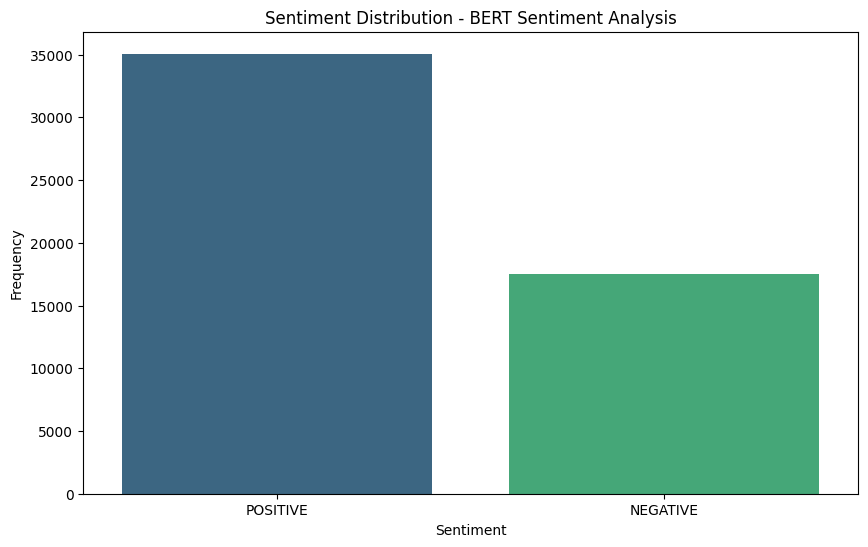

In [83]:
# Visualization: Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='bert_sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution - BERT Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

In [84]:
# Compute confusion matrix
cm = confusion_matrix(df['vader_label'], df['bert_sentiment_numeric'])

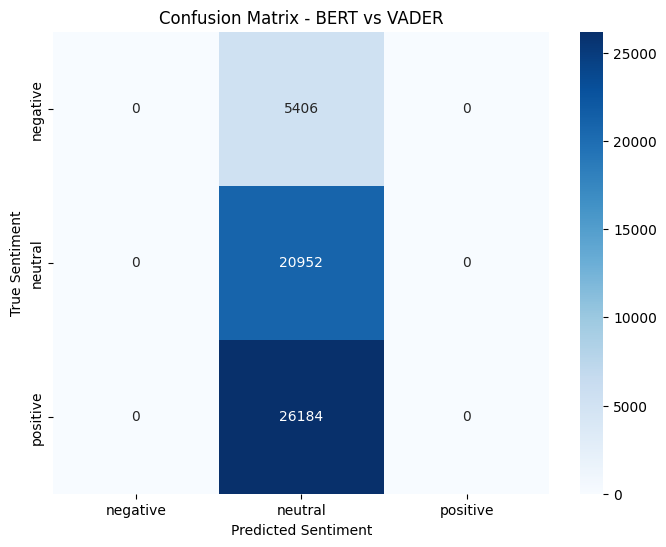

In [85]:
# Create a heatmap for confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix - BERT vs VADER')
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.show()

## Final Evaluation

In [89]:
# AdaBoost Model Evaluation (Before and After Tuning)
print("AdaBoost Model Evaluation:")
print("Classification Report (Before Tuning):")
print(classification_report(y_test, y_pred))  # Before tuning
print("Classification Report (After Tuning):")
print(classification_report(y_test, y_pred_tuned))  # After tuning

# Compare VADER, TextBlob, BERT, and AdaBoost Accuracy
print("\nSentiment Analysis Accuracy Comparison:")
print("VADER Sentiment Analysis Accuracy:", accuracy_score(df['vader_label'], df['vader_label']))
print("BERT Sentiment Analysis Accuracy:", accuracy_score(df['vader_label'], df['bert_sentiment_numeric']))

# AdaBoost Model Accuracy (Before and After Tuning)
print("AdaBoost Model Accuracy (Before Tuning):", accuracy_score(y_test, y_pred))  
print("AdaBoost Model Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))  

AdaBoost Model Evaluation:
Classification Report (Before Tuning):
              precision    recall  f1-score   support

           0       0.81      0.41      0.55      1060
           1       0.70      0.99      0.82      4177
           2       0.96      0.74      0.83      5272

    accuracy                           0.81     10509
   macro avg       0.82      0.71      0.73     10509
weighted avg       0.84      0.81      0.80     10509

Classification Report (After Tuning):
              precision    recall  f1-score   support

           0       0.79      0.47      0.59      1060
           1       0.75      0.99      0.85      4177
           2       0.96      0.80      0.87      5272

    accuracy                           0.84     10509
   macro avg       0.83      0.75      0.77     10509
weighted avg       0.86      0.84      0.83     10509


Sentiment Analysis Accuracy Comparison:
VADER Sentiment Analysis Accuracy: 1.0
BERT Sentiment Analysis Accuracy: 0.3987667009249743
A

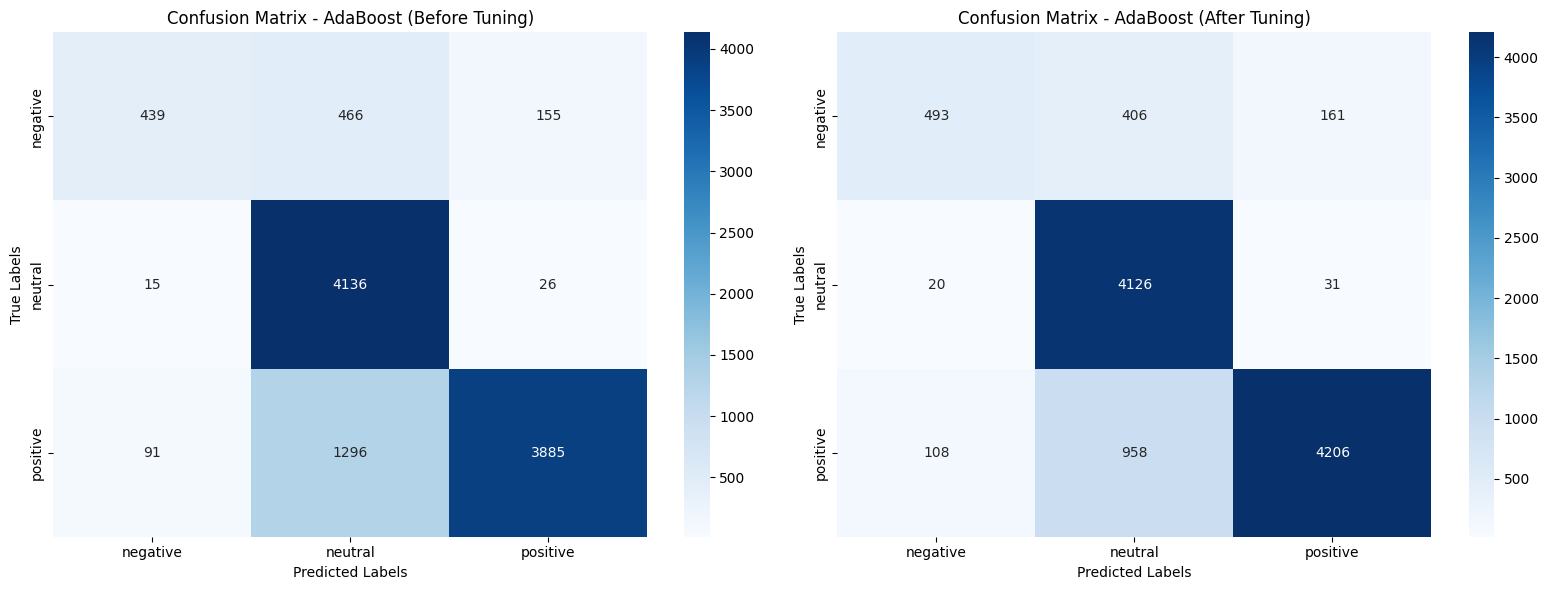

In [90]:
# Compute confusion matrices
cm_before = confusion_matrix(y_test, y_pred)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Confusion Matrix - AdaBoost (Before Tuning)
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'], ax=axes[0])
axes[0].set_title('Confusion Matrix - AdaBoost (Before Tuning)')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot Confusion Matrix - AdaBoost (After Tuning)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'], ax=axes[1])
axes[1].set_title('Confusion Matrix - AdaBoost (After Tuning)')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
plt.tight_layout()

# Show the plot
plt.show()